In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

root_dir = '../input/emotion-detection-fer/'
train_dir = root_dir + 'train/'
test_dir = root_dir + 'test/'

In [2]:
import matplotlib.pyplot as plt

In [3]:
target_var = os.listdir(train_dir)
target_var

['fearful', 'disgusted', 'angry', 'neutral', 'sad', 'surprised', 'happy']

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for taining 
test_idg = ImageDataGenerator(rescale=1./255)


img_size = (48, 48)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode' : 'categorical',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode' : 'categorical',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=train_dir, subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=train_dir, subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=test_dir, **arg_test)

Found 20099 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [6]:
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

2022-11-28 08:33:50.398285: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 08:33:50.563793: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 08:33:50.565118: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 08:33:50.567243: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
    train ,
    validation_data=valid,
    epochs=100)

2022-11-28 08:33:54.072933: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-11-28 08:33:56.642390: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


315/315 [==============================] - 157s 472ms/step - loss: 2.5588 - accuracy: 0.1877 - val_loss: 1.9471 - val_accuracy: 0.2206
Epoch 2/100
315/315 [==============================] - 24s 76ms/step - loss: 2.0800 - accuracy: 0.2395 - val_loss: 1.7173 - val_accuracy: 0.3223
Epoch 3/100
315/315 [==============================] - 25s 79ms/step - loss: 1.8292 - accuracy: 0.3030 - val_loss: 1.5956 - val_accuracy: 0.3823
Epoch 4/100
315/315 [==============================] - 24s 76ms/step - loss: 1.7166 - accuracy: 0.3361 - val_loss: 1.5153 - val_accuracy: 0.4153
Epoch 5/100
315/315 [==============================] - 25s 78ms/step - loss: 1.5879 - accuracy: 0.3818 - val_loss: 1.4493 - val_accuracy: 0.4391
Epoch 6/100
315/315 [==============================] - 24s 77ms/step - loss: 1.5121 - accuracy: 0.4148 - val_loss: 1.3892 - val_accuracy: 0.4630
Epoch 7/100
315/315 [==============================] - 25s 79ms/step - loss: 1.4573 - accuracy: 0.4411 - val_loss: 1.3582 - val_accuracy: 0.

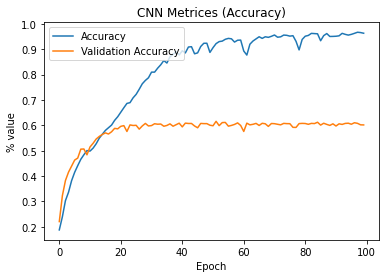

In [8]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

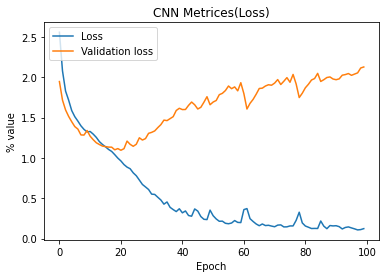

In [9]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('CNN Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [10]:
y_pred = model.predict(test)

In [11]:
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

In [12]:
y_actual = test.classes[test.index_array]

              precision    recall  f1-score   support

           0     0.5151    0.5334    0.5241       958
           1     0.6947    0.5946    0.6408       111
           2     0.4724    0.4004    0.4334      1024
           3     0.8223    0.8140    0.8181      1774
           4     0.5593    0.5466    0.5529      1233
           5     0.4593    0.5293    0.4918      1247
           6     0.7552    0.7497    0.7524       831

    accuracy                         0.6113      7178
   macro avg     0.6112    0.5954    0.6019      7178
weighted avg     0.6134    0.6113    0.6114      7178



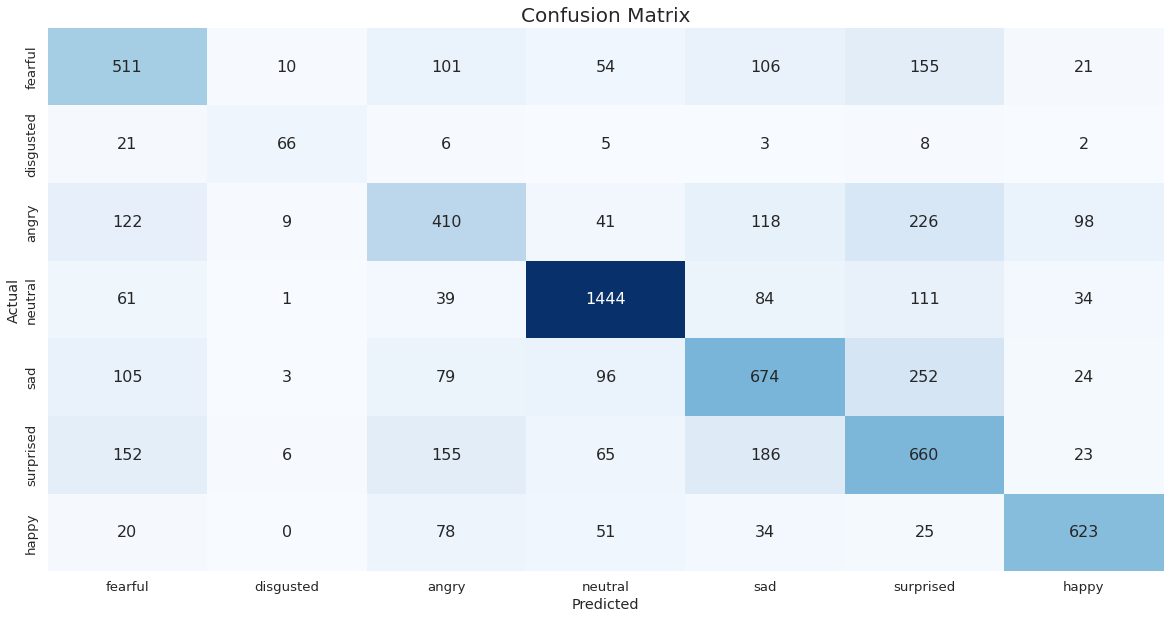

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm_data = confusion_matrix(y_actual, y_pred_labels)
cm = pd.DataFrame(cm_data, columns=target_var, index = target_var)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')
print(classification_report(y_actual, y_pred_labels, digits=4))